## **About Dataset**
### **Context**
Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset from pc
df = pd.read_csv("UpdatedResumeDataSet.csv")

# print first 5 rows

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
#null values print
print("Null values in the dataframe:")
print(df.isnull().sum())


Null values in the dataframe:
Category    0
Resume      0
dtype: int64


In [13]:
#  no of uniqe values in category column
print(df['Category'].nunique())

25


In [14]:
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


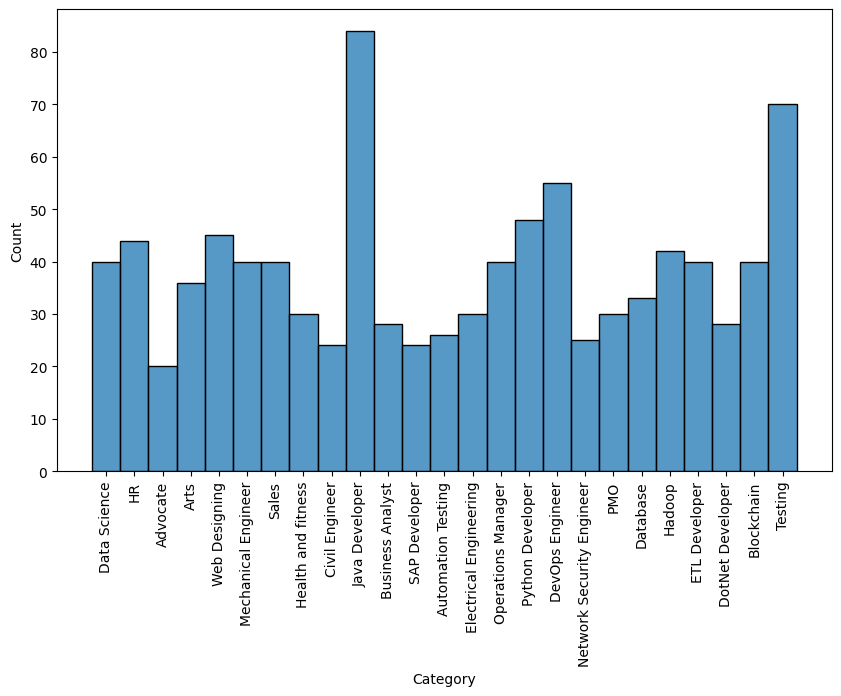

In [19]:
#bar chart of Category column
plt.figure(figsize=(10,6))
sns.histplot(df["Category"],)
# label names vertical
plt.xticks(rotation=90)

plt.show()





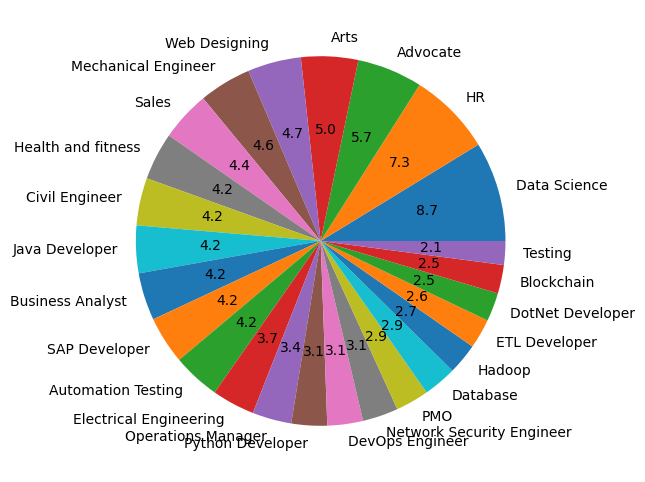

In [21]:
#pie chart of Category column
plt.figure(figsize=(10,6))
plt.pie(df['Category'].value_counts(), labels=df['Category'].unique(), autopct='%1.1f')
plt.show()


In [25]:
df['Category'][0]

'Data Science'

In [27]:
df['Resume'][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

### Cleaning Data

- 1 URLs,
- 2 hashtags,
- 3 mentions,
- 4 special letters,
- 5 punctuations:

In [30]:
import re
# creating a function to remove all unwanted text from resume praghraph so we can oerform nlp on that
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [31]:
cleanResume(" my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com") 
#look now it will remove all unwanted tings


'my webiste like is this and a ess it '

In [32]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [33]:
df['Resume'][1]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

# words into categorical values

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [35]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [ ]:

df #new column 

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


## splitting

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [44]:
X_train.shape #column high amount 7351 due to vectorizxation of resume 

(769, 7351)

In [45]:
X_test.shape

(193, 7351)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  

In [47]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0 

## Save Files

In [48]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [49]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [50]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'